# Player Segmentation and Analysis

A study of player behavior patterns based on activity ratios and clustering

## Loading dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# connecting postgresql
df = pd.read_csv("clean.csv")

df

,steamid,playtime_forever,achievement_count,crafting_count,player_killer_count,combat_count,exploration_count,death_count,leveling_count,survival_count,...,max_fortitude_0,max_fortitude_4,max_fortitude_6,max_fortitude_8,max_fortitude_10,max_die_times_0,max_die_times_1,max_die_times_7,max_die_times_14,max_die_times_28
0,76561198188321818,32674,15,5,0,3,1,1,3,2,...,True,False,False,False,False,False,True,False,False,False
1,76561198000015568,56671,39,8,2,10,6,4,5,4,...,False,False,False,False,True,False,False,False,False,True
2,76561198048689582,2090,4,4,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
3,76561197960769312,11867,31,8,0,7,5,2,5,4,...,False,True,False,False,False,False,False,True,False,False
4,76561198160078610,466,2,1,0,0,0,1,0,0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,76561198021191194,480,5,3,0,0,1,0,0,1,...,True,False,False,False,False,True,False,False,False,False
1520,76561198080730041,2312,26,5,0,9,2,4,4,2,...,False,False,False,False,True,False,False,False,False,True
1521,76561198001271805,254,2,2,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1522,76561197996865611,31538,36,8,0,10,5,4,5,4,...,False,False,False,True,False,False,False,False,False,True


## Data Cleaning

Since our goal is to cluster players based on playing style, we need to remove players who have already unlocked the maximum number of achievements. These players tend to dominate all activity categories, and if kept in the dataset, they could distort the clustering results by masking the differences between more typical playstyles.

In [109]:
df = df[(df['achievement_count']!=43)].copy()
df

,steamid,playtime_forever,achievement_count,crafting_count,player_killer_count,combat_count,exploration_count,death_count,leveling_count,survival_count,...,max_fortitude_0,max_fortitude_4,max_fortitude_6,max_fortitude_8,max_fortitude_10,max_die_times_0,max_die_times_1,max_die_times_7,max_die_times_14,max_die_times_28
0,76561198188321818,32674,15,5,0,3,1,1,3,2,...,True,False,False,False,False,False,True,False,False,False
1,76561198000015568,56671,39,8,2,10,6,4,5,4,...,False,False,False,False,True,False,False,False,False,True
2,76561198048689582,2090,4,4,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
3,76561197960769312,11867,31,8,0,7,5,2,5,4,...,False,True,False,False,False,False,False,True,False,False
4,76561198160078610,466,2,1,0,0,0,1,0,0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,76561198021191194,480,5,3,0,0,1,0,0,1,...,True,False,False,False,False,True,False,False,False,False
1520,76561198080730041,2312,26,5,0,9,2,4,4,2,...,False,False,False,False,True,False,False,False,False,True
1521,76561198001271805,254,2,2,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1522,76561197996865611,31538,36,8,0,10,5,4,5,4,...,False,False,False,True,False,False,False,False,False,True


## KMean Clustering

### PCA 2D plot of playing style

PCA explained variance: 0.81


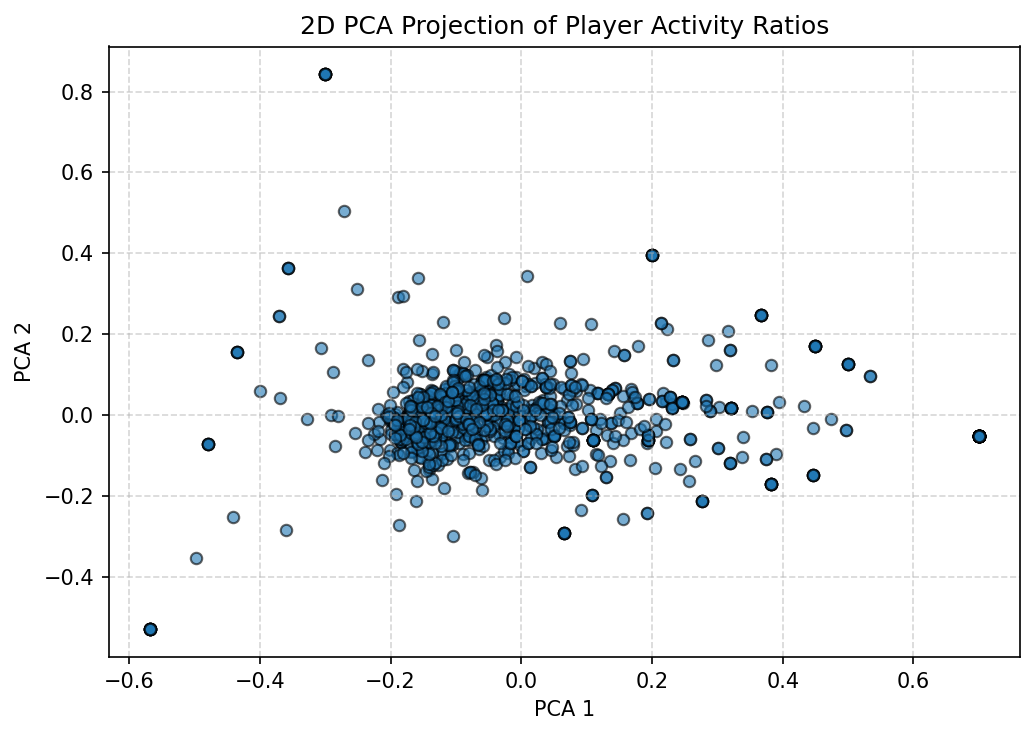

In [110]:
from sklearn.decomposition import PCA

# Prepare activity features for clustering
activity_cols = ['combat_ratio', 'crafting_ratio', 
                'exploration_ratio', 'survival_ratio',
                'death_ratio', 'player_killer_ratio']

# PCA for dimensionality reduction
pca = PCA(n_components=2)
activity_pca = pca.fit_transform(df[activity_cols])
df['pca1'] = activity_pca[:, 0]
df['pca2'] = activity_pca[:, 1]

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2f}")

# --- Basic 2D scatter plot ---
plt.figure(figsize=(7, 5), dpi=150)
plt.scatter(df['pca1'], df['pca2'], alpha=0.6, s=30, edgecolor='k')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("2D PCA Projection of Player Activity Ratios")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

- PCA explains 81% of the variance, so most of the variation in player activity ratios is captured in the first two components.

- But the scatterplot shows no clear separations, meaning player behaviors are broadly similar (overlapping styles) rather than naturally splitting into sharply distinct groups.

- This explains why clustering won’t give us perfectly separated groups — the differences are more subtle, not like “apples vs oranges” but more like shades of the same playstyle.

- To evaluate whether player activity ratios show distinct playstyles, we applied Principal Component Analysis (PCA). The first two principal components explain 81% of the variance, suggesting that the dimensionality of player activity can be effectively reduced.

- However, the PCA scatterplot shows that most players cluster in a dense central region, with no strong natural separation. This indicates that overall playing styles do not differ dramatically across the population, and any segmentation will likely capture subtle differences rather than sharply divided groups.

---

### Finding recommended number of clusters

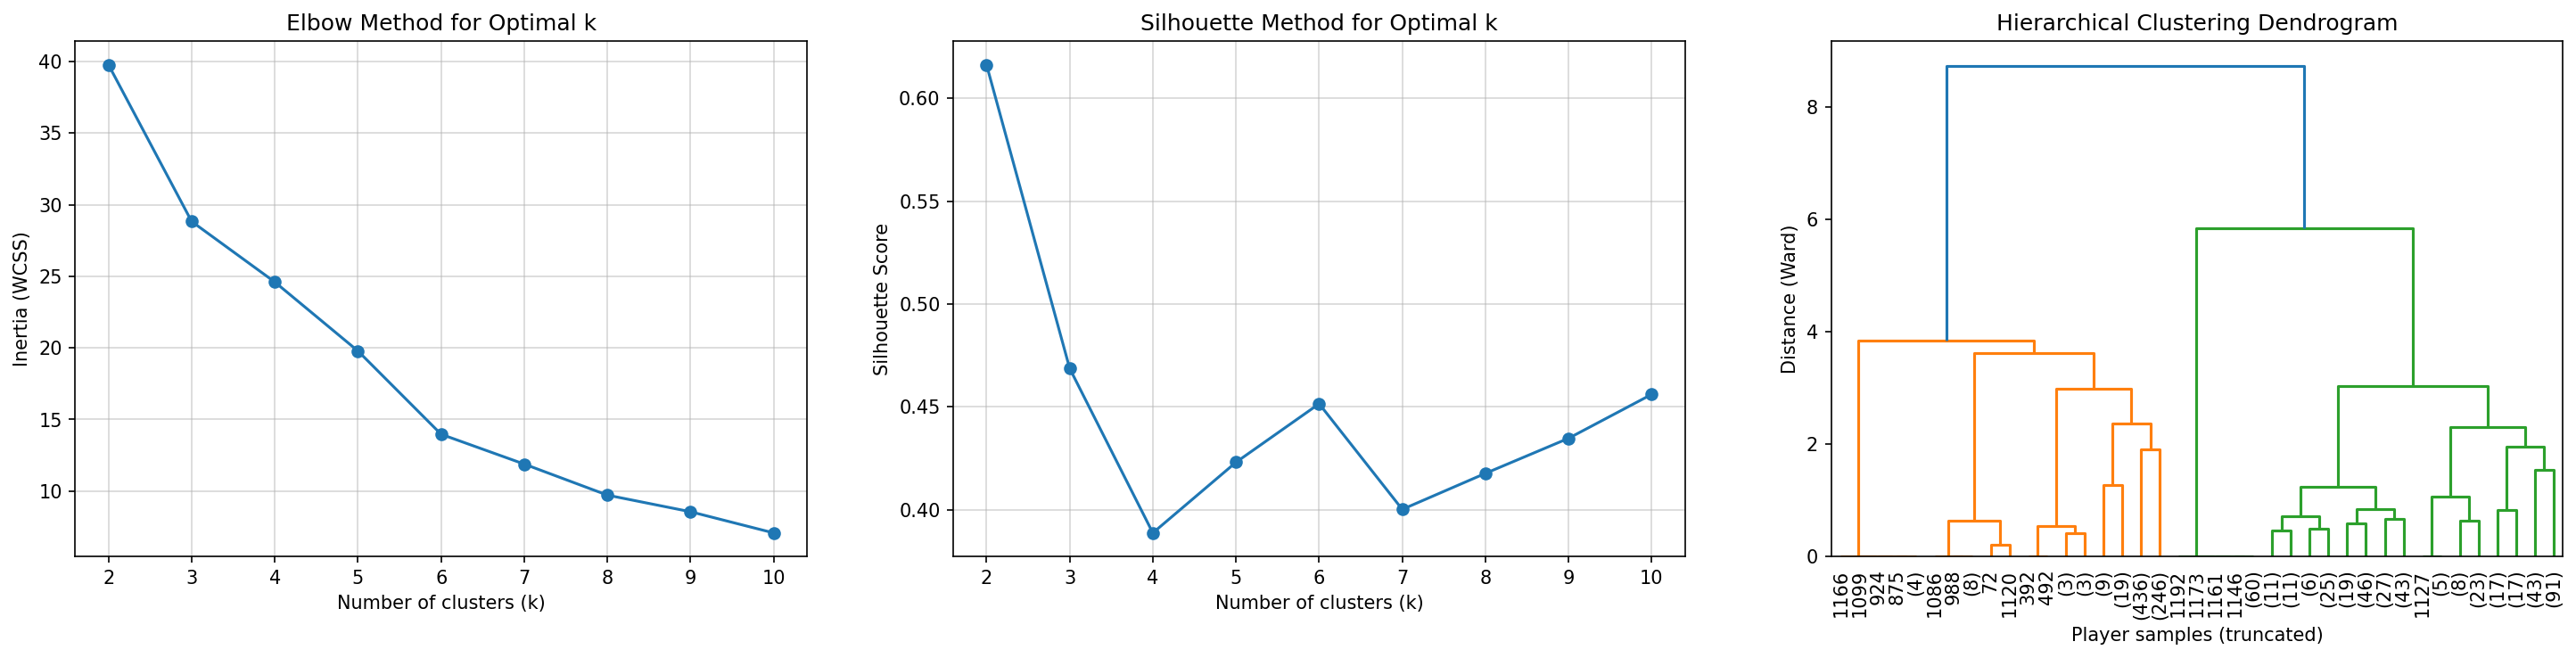

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X = df[['pca1', 'pca2']].values

inertias = []
ks = range(2, 11)  # test k = 2–10
plt.figure(figsize=(24,5),dpi=150)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.subplot(1,3,1)
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True, alpha=0.5)

sil_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

plt.subplot(1,3,2)
plt.plot(ks, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.grid(True, alpha=0.5)

# Use PCA features or original ratios
X = df[activity_cols].values  

# Hierarchical clustering (Ward’s method = variance minimization)
Z = linkage(X, method='ward')

# Plot dendrogram
plt.subplot(1,3,3)
dendrogram(Z, truncate_mode='level', p=5,  # show only last merges
           leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Player samples (truncated)")
plt.ylabel("Distance (Ward)")
plt.show()

Elbow Method

The inertia (WCSS) curve shows a noticeable “elbow” around k=2 or k=3, after which the decrease slows.

This suggests 2–3 clusters might capture most of the variance.

Silhouette Score

The highest score is at k=2 (~0.62), which indicates that clusters are reasonably separated and cohesive.

For k > 2, the silhouette drops significantly (to ~0.39–0.45), meaning adding more clusters does not improve structure.

Cluster Visualization (PCA)

With k=2, the scatterplot shows one dense central cluster and a smaller, more spread-out cluster toward the right.

The separation isn’t super strong, but it’s visible.

---

### K = 2

With K=2, the picture is very **coarse-grained**:

- Cluster 0 (**Balanced players**) → Spread activities across combat, exploration, survival, death, etc. They show longer playtime, accumulate more achievements, and overall look like more committed players.

- Cluster 1 (**Crafting specialists**) → Dominated by **crafting_ratio**, with little emphasis on other activities. They typically show **shorter playtime** and lower achievement progression.

This split is already meaningful: you can tell that “crafting-focused” vs “balanced play” is the **first-order structure** in the data.

But as you noticed, within each cluster there are still hidden **subgroups**:

- Some “balanced” players might lean more toward combat-heavy survivalists vs exploration-oriented adventurers.

- Some “crafting-focused” players might include short-session builders vs long-term world designers.

That’s why increasing K is the natural next step: it will let you zoom in and discover finer-grained playstyles. Run clustering with K = 6 and compare inertia (elbow method) or silhouette scores.

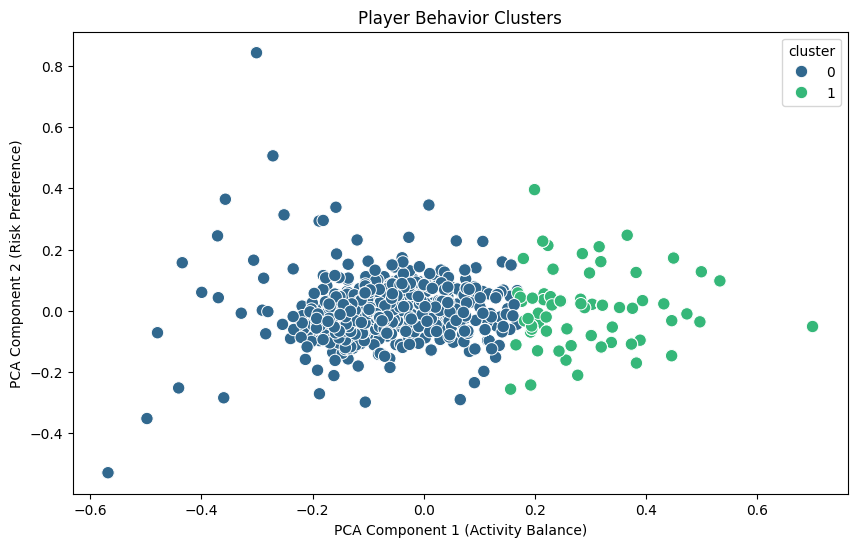

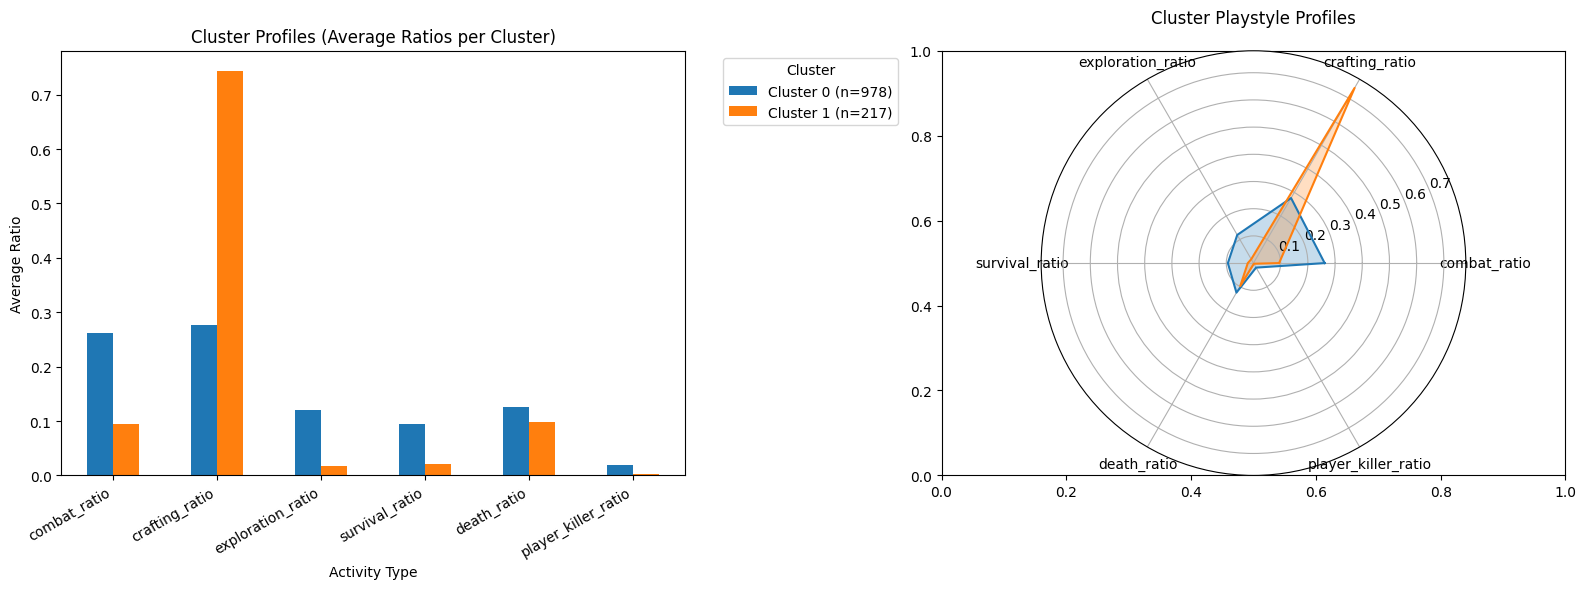

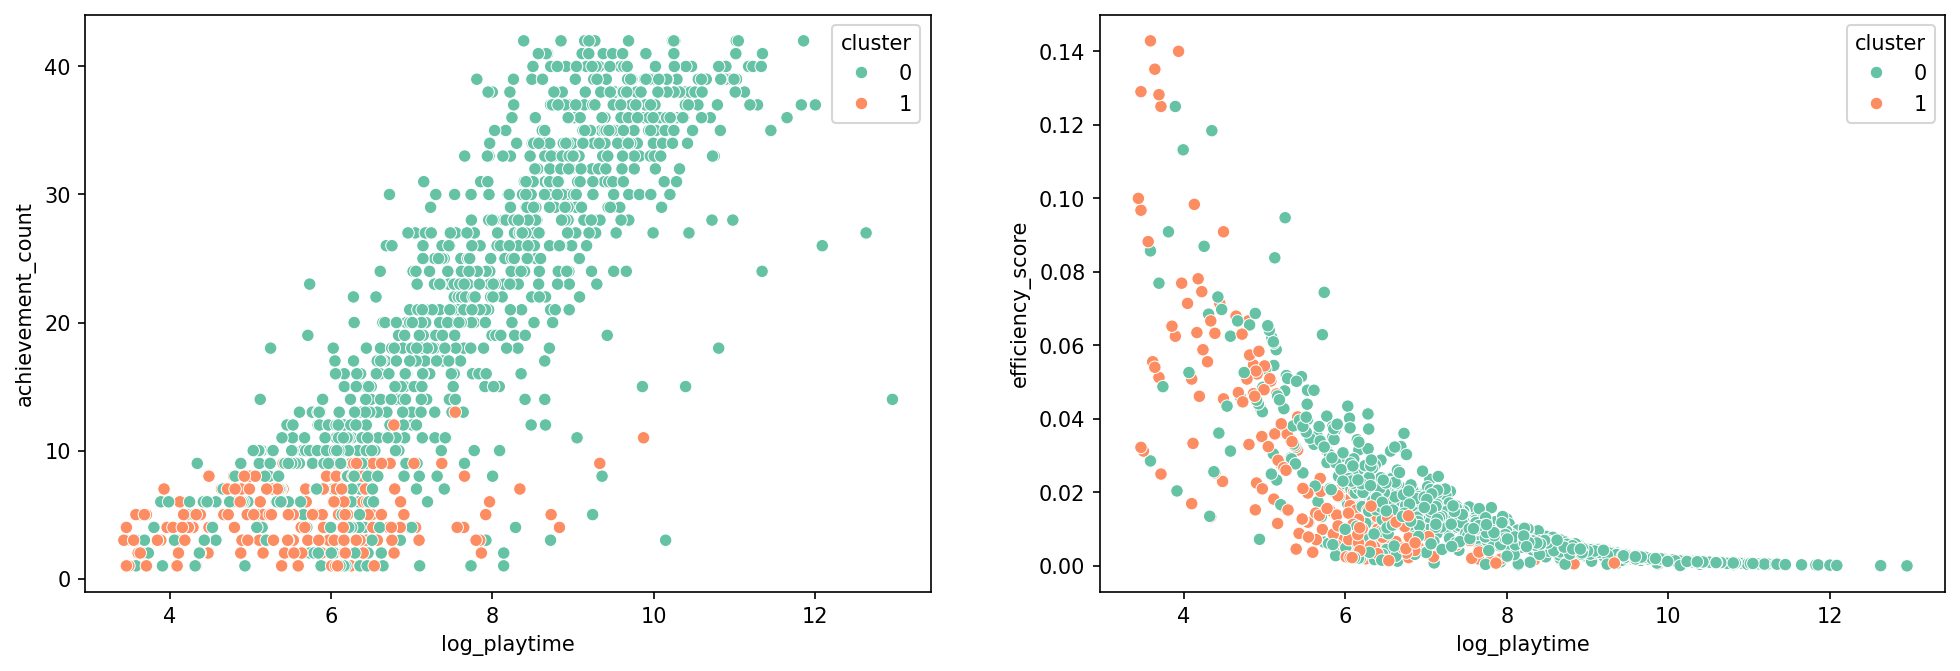

In [ ]:
from sklearn.cluster import KMeans
# ===== 5. MODELING =====
# A. Player Clustering (Behavioral Archetypes)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[activity_cols])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=80)
plt.title('Player Behavior Clusters')
plt.xlabel('PCA Component 1 (Activity Balance)')
plt.ylabel('PCA Component 2 (Risk Preference)')
plt.show()

# Cluster profiles
cluster_profiles = df.groupby('cluster')[activity_cols].mean()
cluster_sizes = df['cluster'].value_counts().sort_index()

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Left: Bar plot ---
ax1 = cluster_profiles.T.plot(kind='bar', ax=axes[0])

# Update legend with cluster sizes
new_labels = [f"Cluster {i} (n={cluster_sizes[i]})" for i in cluster_profiles.index]
ax1.legend(new_labels, title="Cluster", bbox_to_anchor=(1.05,1), loc='upper left')
ax1.set_title("Cluster Profiles (Average Ratios per Cluster)")
ax1.set_ylabel("Average Ratio")
ax1.set_xlabel("Activity Type")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# --- Right: Radar plot ---
labels = np.array(activity_cols)
n_features = len(activity_cols)
angles = np.linspace(0, 2*np.pi, n_features, endpoint=False).tolist()
angles += angles[:1]

ax2 = plt.subplot(122, polar=True)
for idx, row in cluster_profiles.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax2.plot(angles, values, label=f'Cluster {idx} (n={cluster_sizes[idx]})')
    ax2.fill(angles, values, alpha=0.25)

ax2.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
ax2.set_title("Cluster Playstyle Profiles", pad=20)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5), dpi=150)
plt.subplot(1,2,1)
sns.scatterplot(x=df['log_playtime'],y=df['achievement_count'], hue=df['cluster'], palette='Set2')
plt.subplot(1,2,2)
sns.scatterplot(x=df['log_playtime'],y=df['efficiency_score'], hue=df['cluster'], palette='Set2')
plt.show()

---

### K = 6

- PCA scatter with clusters (top plot)

  - The X-axis (PCA1) seems to represent a balance between crafting vs. combat/exploration.

    - Left side → more combat-heavy.

    - Right side → more crafting-heavy.

  - The Y-axis (PCA2) is like a risk preference axis: higher values correspond to clusters with higher death_ratio or player_killer_ratio.

  - Cluster separation is fairly clean, especially between:

    - Cluster 1 (orange) = crafting-specialists

    - Cluster 4 (purple) = combat-specialists

    - Cluster 3 (pink) = very small but extreme “death-heavy” group

- Cluster Profiles (bar + radar, middle plots)

  - Cluster 0 (blue, n=629) → Balanced “generalists” with modest values across all activities.

  - Cluster 1 (orange, n=76) → Extremely high crafting_ratio (builders/crafters).

  - Cluster 2 (green, n=150) → Skewed toward exploration with decent crafting.

  - Cluster 3 (red, n=9) → Very high death_ratio → struggling/survival-challenged players.

  - Cluster 4 (purple, n=17) → Dominated by combat_ratio (fighters, PvE oriented).

  - Cluster 5 (brown, n=314) → Moderate mix, but slightly higher survival & crafting → efficient “steady progress” group.

    The radar chart confirms these sharp contrasts.

- Achievement count vs playtime, Efficiency vs playtime (bottom plots)

  - Cluster 0 (generalists) → largest group, achieve the most (high achievement_count) with longer playtime.

  - Cluster 1 (crafters) → relatively low achievements despite moderate playtime → crafting may not yield many achievements.

  - Cluster 2 (explorers) → middle ground — decent achievements for their playtime, but not as high as generalists.

  - Cluster 3 (death-heavy) → very low achievements, short playtime, and high deaths → likely “frustrated quitters.” These are likely frustrated new players who didn’t progress far.

  - Cluster 4 (fighters) → small cluster, moderate achievements for time invested. These are possibly players who tested combat early and quit quickly.

  - Cluster 5 (steady progress) → relatively efficient players — achieve a lot early, but curve flattens with long playtime (lower efficiency at high hours).

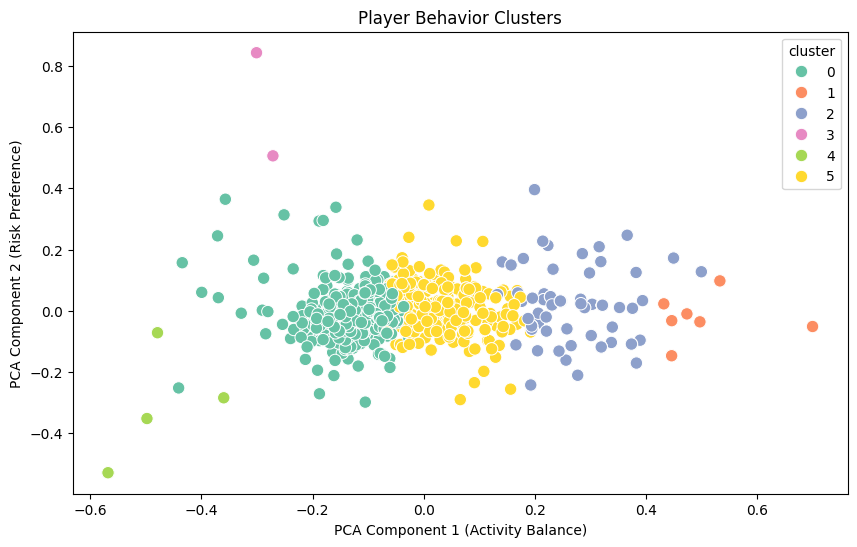

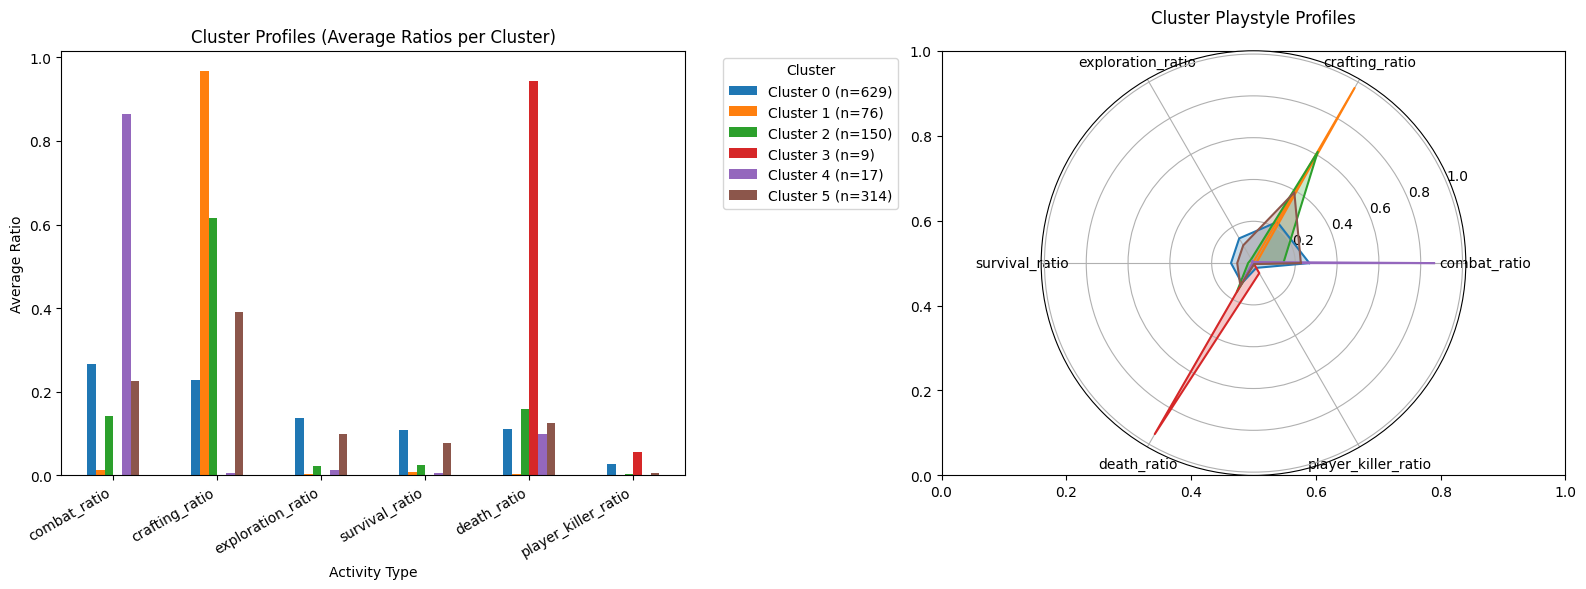

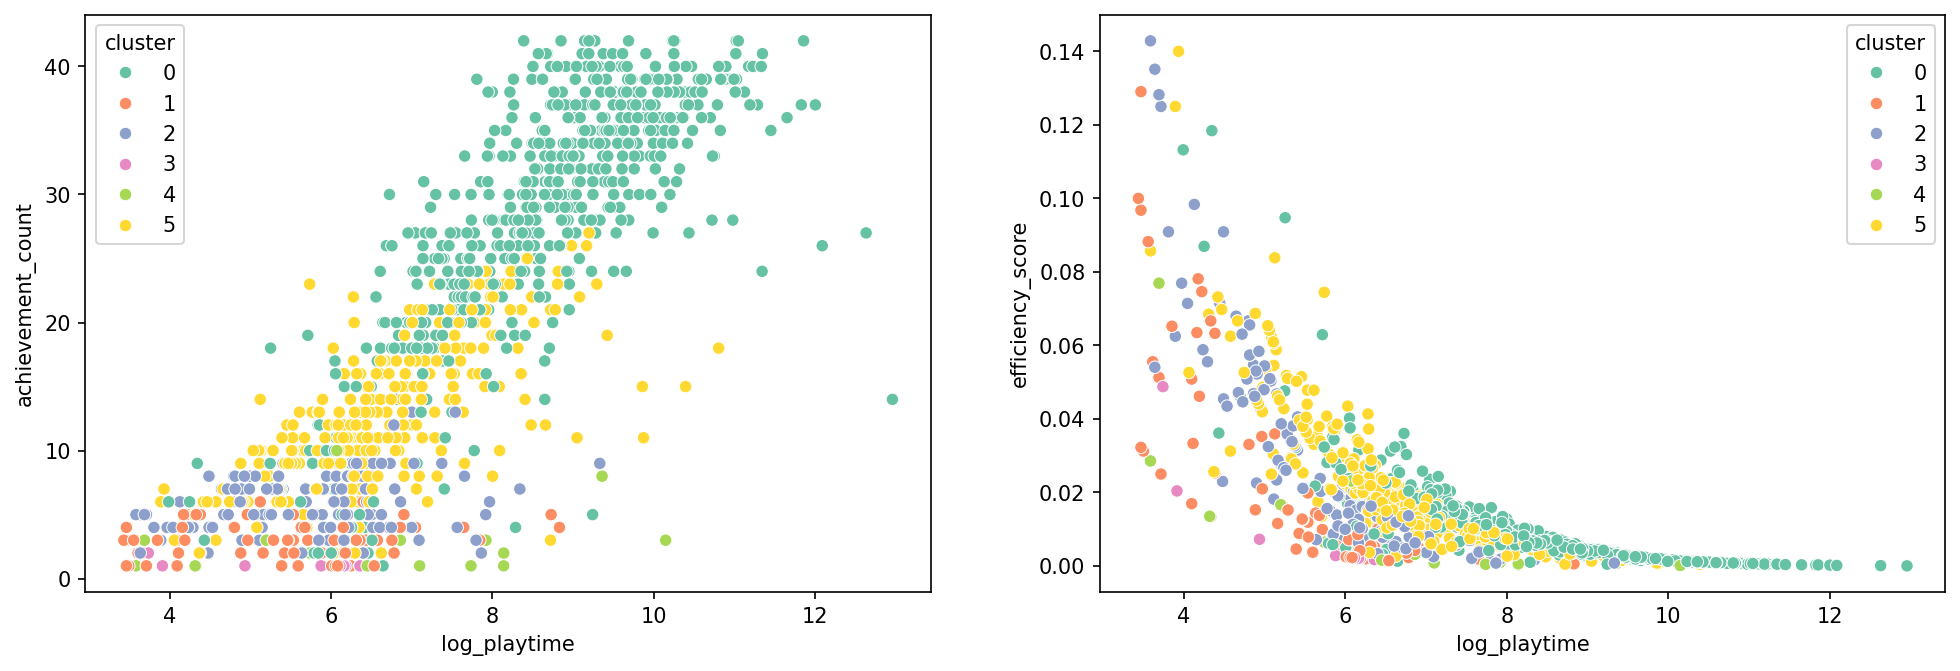

In [125]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score  # Add this to your imports
# ===== 5. MODELING =====
# A. Player Clustering (Behavioral Archetypes)
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df[activity_cols])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2', s=80)
plt.title('Player Behavior Clusters')
plt.xlabel('PCA Component 1 (Activity Balance)')
plt.ylabel('PCA Component 2 (Risk Preference)')
plt.show()

# Cluster profiles
cluster_profiles = df.groupby('cluster')[activity_cols].mean()
cluster_sizes = df['cluster'].value_counts().sort_index()

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Left: Bar plot ---
ax1 = cluster_profiles.T.plot(kind='bar', ax=axes[0])

# Update legend with cluster sizes
new_labels = [f"Cluster {i} (n={cluster_sizes[i]})" for i in cluster_profiles.index]
ax1.legend(new_labels, title="Cluster", bbox_to_anchor=(1.05,1), loc='upper left')
ax1.set_title("Cluster Profiles (Average Ratios per Cluster)")
ax1.set_ylabel("Average Ratio")
ax1.set_xlabel("Activity Type")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# --- Right: Radar plot ---
labels = np.array(activity_cols)
n_features = len(activity_cols)
angles = np.linspace(0, 2*np.pi, n_features, endpoint=False).tolist()
angles += angles[:1]

ax2 = plt.subplot(122, polar=True)
for idx, row in cluster_profiles.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax2.plot(angles, values, label=f'Cluster {idx} (n={cluster_sizes[idx]})')
    ax2.fill(angles, values, alpha=0.25)

ax2.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
ax2.set_title("Cluster Playstyle Profiles", pad=20)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5), dpi=150)
plt.subplot(1,2,1)
sns.scatterplot(x=df['log_playtime'],y=df['achievement_count'], hue=df['cluster'], palette='Set2')
plt.subplot(1,2,2)
sns.scatterplot(x=df['log_playtime'],y=df['efficiency_score'], hue=df['cluster'], palette='Set2')
plt.show()

---